In [1]:
from ResearchMain import *

In [2]:
_ = all_df[[i for i in all_df.columns if
            isinstance(i, str) and (i.startswith('S') or i.endswith('-Ф'))]].replace(0, 0.00001)
sediment_df = _.drop(['S-Size-d((0.9-0.1)/0.5)', 'S-pH'], axis=1)

water_df = all_df[[i for i in all_df.columns if
                   isinstance(i, str) and i.startswith('W')]].replace(0, 0.00001)
water_df = water_df.drop(['W-PO_{4}^{3-}', 'W-TP'], axis=1)

In [3]:
all_df

,Bacterial 16S rRNA,Archaeal 16S rRNA,AOA_amoA,AOB_amoA,nxrA,narG,napA,nirK,nirS,nosZ,...,3801.894,4365.158,5011.872,5754.399,6606.934,7585.776,8709.636,10000.0,Period,River
D-N1,3.131311e+12,1.646282e+07,9.372749e+06,238737.749855,4.809669e+06,1.693294e+05,1.147444e+06,6.111955e+05,2.580789e+08,3.427432e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry Season,Nanfei River
D-N2,2.310274e+12,1.606909e+07,1.310459e+07,338309.302429,6.175807e+06,5.203335e+05,3.427096e+06,7.079003e+05,4.167981e+08,9.668389e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry Season,Nanfei River
D-N3,9.328554e+11,1.322307e+07,1.571698e+07,412887.196731,4.135236e+06,7.257937e+04,3.493181e+05,5.374574e+05,2.427963e+08,3.473164e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry Season,Nanfei River
D-N4,9.369330e+11,4.875424e+07,1.643166e+07,489411.878787,1.537017e+07,5.395949e+04,2.081086e+05,5.704071e+05,2.891821e+08,1.213764e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry Season,Nanfei River
D-N5,2.465170e+12,4.627955e+07,2.990348e+07,528491.109190,1.631022e+07,4.789525e+04,4.383332e+05,1.478592e+06,1.420427e+08,5.683137e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dry Season,Nanfei River
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W-H8,3.018167e+12,2.008959e+08,7.468539e+07,292694.160549,4.418316e+09,1.857077e+06,4.228224e+06,3.455924e+07,9.231036e+07,8.684252e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wet Season,Hangbu River
W-H9,3.239835e+12,1.181798e+08,4.200252e+07,465551.966622,2.781485e+09,1.705901e+06,2.498973e+06,3.240429e+07,6.205803e+07,2.022403e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wet Season,Hangbu River
W-H10,3.313568e+12,1.974228e+08,7.328582e+07,615337.809914,4.666949e+09,9.620983e+05,4.403474e+06,2.686501e+07,9.518481e+07,8.536139e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wet Season,Hangbu River
W-H11,3.901704e+12,1.908625e+08,7.064787e+07,487954.228922,5.364548e+09,7.454658e+05,3.090290e+06,2.896472e+07,7.285221e+07,3.245037e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wet Season,Hangbu River


In [4]:
sediment_df

,S-TN,S-TP,S-Size-d(0.1),S-Size-d(0.5),S-Size-d(0.9),Ⅰ-Ф,Ⅱ-Ф,Ⅲ-Ф,Ⅳ-Ф,Ⅴ-Ф
D-N1,705,806.285714,11.777,38.340,257.008,1201850.109,1570607.01,1.074539e+06,288732.5325,7.035140e+05
D-N2,320,794.285714,45.008,807.765,1239.506,2129004.270,2617675.11,9.851356e+05,360476.3250,6.234932e+05
D-N3,420,791.000000,611.957,875.213,1252.883,1463080.401,1806106.41,1.347911e+06,324498.2175,1.078437e+06
D-N4,650,768.000000,20.270,53.408,181.770,1556880.075,2017529.91,1.388097e+06,374268.4650,1.161176e+06
D-N5,1475,797.714286,9.567,40.619,116.947,1301272.695,2147362.11,1.412961e+06,219413.6775,1.005040e+06
...,...,...,...,...,...,...,...,...,...,...
W-H8,1325,956.571429,13.179,54.533,177.715,451096.641,887695.47,6.038852e+05,95290.0200,4.385763e+05
W-H9,1655,924.000000,12.406,46.868,175.772,988848.351,1400201.37,1.420681e+06,133869.1050,1.112571e+06
W-H10,2060,901.142857,12.816,45.730,169.597,485126.361,1032493.77,7.964262e+05,74844.0000,5.822210e+05
W-H11,2060,998.285714,13.281,56.314,187.891,424755.441,845680.77,8.486516e+05,113477.2200,6.512220e+05


In [5]:
sediment_df

,S-TN,S-TP,S-Size-d(0.1),S-Size-d(0.5),S-Size-d(0.9),Ⅰ-Ф,Ⅱ-Ф,Ⅲ-Ф,Ⅳ-Ф,Ⅴ-Ф
D-N1,705,806.285714,11.777,38.340,257.008,1201850.109,1570607.01,1.074539e+06,288732.5325,7.035140e+05
D-N2,320,794.285714,45.008,807.765,1239.506,2129004.270,2617675.11,9.851356e+05,360476.3250,6.234932e+05
D-N3,420,791.000000,611.957,875.213,1252.883,1463080.401,1806106.41,1.347911e+06,324498.2175,1.078437e+06
D-N4,650,768.000000,20.270,53.408,181.770,1556880.075,2017529.91,1.388097e+06,374268.4650,1.161176e+06
D-N5,1475,797.714286,9.567,40.619,116.947,1301272.695,2147362.11,1.412961e+06,219413.6775,1.005040e+06
...,...,...,...,...,...,...,...,...,...,...
W-H8,1325,956.571429,13.179,54.533,177.715,451096.641,887695.47,6.038852e+05,95290.0200,4.385763e+05
W-H9,1655,924.000000,12.406,46.868,175.772,988848.351,1400201.37,1.420681e+06,133869.1050,1.112571e+06
W-H10,2060,901.142857,12.816,45.730,169.597,485126.361,1032493.77,7.964262e+05,74844.0000,5.822210e+05
W-H11,2060,998.285714,13.281,56.314,187.891,424755.441,845680.77,8.486516e+05,113477.2200,6.512220e+05


In [6]:
all_df.loc[['L-N7', 'L-N8']]

,Bacterial 16S rRNA,Archaeal 16S rRNA,AOA_amoA,AOB_amoA,nxrA,narG,napA,nirK,nirS,nosZ,...,3801.894,4365.158,5011.872,5754.399,6606.934,7585.776,8709.636,10000.0,Period,River
L-N7,4.630610e+12,7.540895e+07,1.398217e+07,540424.650558,1.188264e+09,64237.276107,466398.488209,4.043269e+06,5.317400e+07,432693.377478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Level Season,Nanfei River
L-N8,3.147230e+12,4.182022e+07,8.202181e+06,495332.614241,1.167430e+09,84398.647309,694967.339683,1.815963e+06,5.461636e+07,615435.846318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Level Season,Nanfei River


In [7]:
# all_df[(all_df['Period'] == 'Level Season') & (all_df['River'] == 'Nanfei River')].iloc[:,:40]
demo = sediment_df.loc[[i for i in all_df.index if i.startswith('L-N')],:]
# demo.loc[:, [i for i in all_df.columns if isinstance(i, str) and i.endswith('-Ф')]].mean()
demo['S-TP'].tolist()

[765.71,
 773.14,
 793.71,
 777.14,
 861.14,
 814.86,
 911.43,
 932.57,
 752.0,
 911.43,
 932.57,
 752.0]

In [8]:
a = [765.71,
 773.14,
 793.71,
 777.14,
 861.14,
 814.86,
 752.0,
 752.0]

np.mean(a)

786.2125

In [9]:
#PCA分析
water_pca = calc_pca(water_df)
sediment_pca = calc_pca(sediment_df)
plot_data = [water_pca, sediment_pca]

In [10]:
sediment_pca

,PCA 0,PCA 1,River,Period
D-N1,0.114851,-0.475742,Nanfei River,Dry Season
D-N2,3.714279,-6.161433,Nanfei River,Dry Season
D-N3,4.246245,-10.691420,Nanfei River,Dry Season
D-N4,1.376294,-0.079334,Nanfei River,Dry Season
D-N5,0.190204,0.304520,Nanfei River,Dry Season
...,...,...,...,...
W-H8,-2.423278,-0.733550,Hangbu River,Wet Season
W-H9,-0.952392,-0.038647,Hangbu River,Wet Season
W-H10,-2.372605,-0.384511,Hangbu River,Wet Season
W-H11,-2.433333,-0.512002,Hangbu River,Wet Season


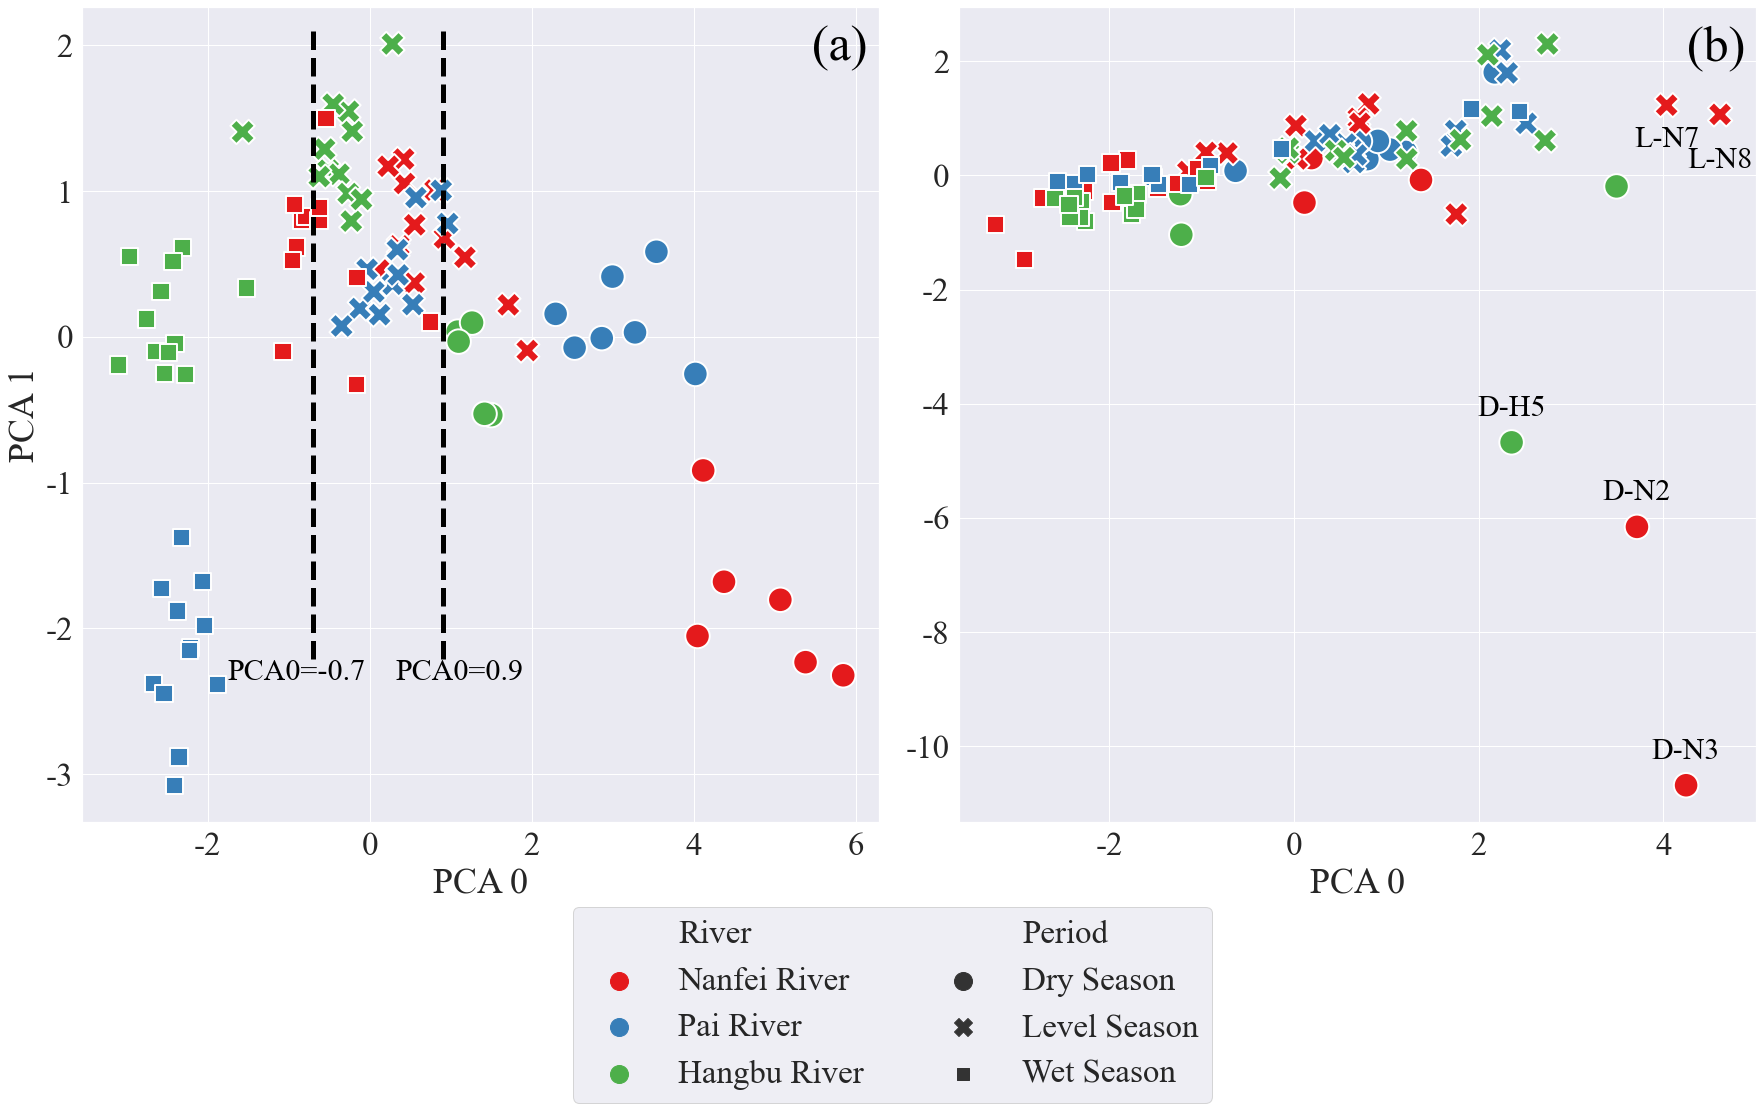

In [18]:
# 可视化
sns.set(
    style='darkgrid',
    font='Times New Roman',
    font_scale=3
)
fig, ax_arr = plt.subplots(1, 2, figsize=(30, 15))
fig.subplots_adjust(wspace=0.1)  # 设置子图的横纵间距

# 要进行标记的特殊点
spot_name = {
    'D-N2': [0, 0.6],
    'D-H5': [0, 0.6],
    'D-N3': [0, 0.6],
    'L-N7': [0, -0.6],
    'L-N8': [0, -0.8]
}

for index, cur_df in enumerate(plot_data):
    cur_ax = ax_arr[index]
    sns.scatterplot(
        data=cur_df,
        x='PCA 0',
        y='PCA 1',
        hue='River',
        style='Period',
        s=600,
        palette="Set1",  # 颜色版
        ax=cur_ax
    )
    # 删除子图的图例
    cur_ax.get_legend().remove()
    # 添加编号
    cur_ax.text(
        0.95,
        0.95,
        f'({CHAR[index]})',
        fontdict={'size': '50', 'color': 'white'},
        transform=cur_ax.transAxes,
        color='black',
        ha='center', va='center'
    )

    if index:
        cur_ax.set_ylabel(None)

        # 特殊点标记
        for name, coor in spot_name.items():
            # 计算坐标：原始位置+偏移
            x, y = sediment_pca.loc[name, 'PCA 0'] + coor[0], sediment_pca.loc[name, 'PCA 1'] + coor[1]

            cur_ax.text(
                x,
                y,
                name,
                fontdict={'size': '30', 'color': 'white'},
                color='black',
                ha='center', va='center'
            )

        # cur_ax.axvline(1, ymin=0.1, ymax=0.65, color='black', linestyle='--', linewidth=5)
        # cur_ax.text(
        #     2.1,
        #     1.3,
        #     f'PCA0={1}',
        #     fontdict={'size': '30', 'color': 'white'},
        #     color='black',
        #     ha='center', va='center'
        # )
        #
        # cur_ax.axhline(2, xmin=0.02, xmax=0.45, color='black', linestyle='--', linewidth=5)
        # cur_ax.text(
        #     3,
        #     2.1,
        #     f'PCA1={2}',
        #     fontdict={'size': '30', 'color': 'white'},
        #     color='black',
        #     ha='center', va='center'
        # )
    else:
        # 分割线
        split_line_x = {
            -.7: [-.2, 0],
            .9: [.2, 0],
        }
        for x, coor in split_line_x.items():
            cur_ax.axvline(x, ymin=0.2, ymax=0.98, color='black', linestyle='--', linewidth=5)
            cur_ax.text(
                x + coor[0],
                -2.3 + coor[1],
                f'PCA0={x}',
                fontdict={'size': '30', 'color': 'white'},
                color='black',
                ha='center', va='center'
            )

lines, labels = fig.axes[-1].get_legend_handles_labels()  # 获取最后一个子图的图例
fig.legend(
    lines,
    labels,
    ncol=2,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    markerscale=3,  # 图例中图标的调整
    # prop={'family':'SimHei','size':4}  # 图例中文字的调整
)

# 保存图片
fig.savefig(EXPORT_PATH + '环境因子PCA图' + IMG_TYPE, dpi=DPI, bbox_inches='tight')